In [1]:
#Importing Necessary Packages
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt

In [2]:
#Instantiating Environment and Setting Default Brain
env = UnityEnvironment(file_name="Banana.app")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
#Checking State Length and Number of Actions

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

print("Action size: ", brain.vector_action_space_size )

state = env_info.vector_observations[0]
state_size = len(state)
print("State Length: ", state_size)



Action size:  4
State Length:  37


In [4]:
from agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0)

def train(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    scores = [] #List with scores of each episode
    scores_window = deque(maxlen=100) #Last 100 scores
    eps = eps_start #Initialize starting position of epsilon
    
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        score = 0
        
        for t in range(max_t):
            action = agent.act(state,eps)
            
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]    
            
            agent.step(state,action,reward,next_state,done)
            state = next_state
            score += reward
            
            if done:
                break
        
        #save most recent score
        scores_window.append(score) 
        scores.append(score)
        
        #decrease epsilon
        eps = max(eps_end, eps_decay*eps)
        
        #Print score every 100 episodes
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        #Save Weights inside 'checkpoint.pth'
        if np.mean(scores_window)>=14:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.net_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

scores = train()
        

Episode 100	Average Score: 0.97
Episode 200	Average Score: 5.02
Episode 300	Average Score: 8.21
Episode 400	Average Score: 10.42
Episode 500	Average Score: 12.86
Episode 600	Average Score: 13.91
Episode 606	Average Score: 14.00
Environment solved in 506 episodes!	Average Score: 14.00


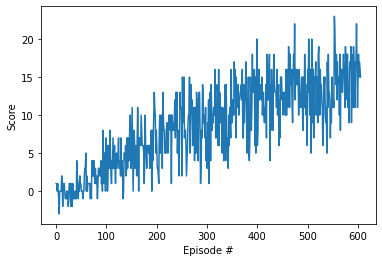

In [5]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()